In [1]:
#chapter 10 interpretation of deep models

In [2]:
##setup tensorflow v1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
## this will install anaconda and deepchem, will add path, execution will take sometime

!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-07-27 21:42:20--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   165MB/s    in 3.1s    

2020-07-27 21:42:23 (165 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=py37_0
    - ana

In [4]:
import deepchem as dc
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [6]:
# now lets see if it works bc this chapter is based on chapter 8 which i skipped
#part 1 I will attempt when I'll get the computational resources
#part 1 is saliency maps for diabetic retinopathy

In [7]:
#part2 is iterpreting TF binding site
#uploaded file

In [9]:
#extractall() with any argument will extract everything in the same directory 
# this is what is expected
import zipfile
with zipfile.ZipFile('tocolabch6.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
import tensorflow as tf
import deepchem.models.tensorgraph.layers as layers

In [12]:
# Start by building the model.

model = dc.models.TensorGraph(batch_size=1000, model_dir='tf')
features = layers.Feature(shape=(None, 101, 4))
labels = layers.Label(shape=(None, 1))
weights = layers.Weights(shape=(None, 1))
prev = features
for i in range(3):
    prev = layers.Conv1D(filters=15, kernel_size=10, activation=tf.nn.relu, padding='same', in_layers=prev)
    prev = layers.Dropout(dropout_prob=0.5, in_layers=prev)
logits = layers.Dense(out_channels=1, in_layers=layers.Flatten(prev))
output = layers.Sigmoid(logits)
model.add_output(output)
loss = layers.SigmoidCrossEntropy(in_layers=[labels, logits])
weighted_loss = layers.WeightedError(in_layers=[loss, weights])
model.set_loss(weighted_loss)

In [13]:
train = dc.data.DiskDataset('train_dataset')
valid = dc.data.DiskDataset('valid_dataset')

Loading dataset from disk.
Loading dataset from disk.


In [26]:
test = dc.data.DiskDataset('test_dataset')

Loading dataset from disk.


In [14]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

In [15]:
# exactly similar to chapter 6, here training and then will do the saliency analysis
for i in range(20):
  model.fit(train, nb_epoch=10)
  print (i)
  print('training: ', model.evaluate(train, [metric]))
  print('validation: ',model.evaluate(valid, [metric]))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






0
computed_metrics: [0.6234659526924914]
training:  {'roc_auc_score': 0.6234659526924914}
computed_metrics: [0.5748351570415804]
validation:  {'roc_auc_score': 0.5748351570415804}
1
computed_metrics: [0.6665792182525152]
training:  {'roc_auc_score': 0.6665792182525152}
computed_metrics: [0.6097484155194032]
validation:  {'roc_auc_score': 0.6097484155194032}
2
computed_metrics: [0.7604534213554954]
training:  {'roc_auc_score': 0.7604534213554954}
computed_metrics: [0.7290826049590149]
validation:  {'roc_auc_score': 0.7290826049590149}
3
computed_metrics: [0.7928957365922282]
training:  {'roc_auc_score': 0.7928957365922282}
computed_metrics: [0.7329531124430386]
validation:  {'roc_auc_score': 0.7329531124430386}
4
computed_metrics: [0.8127779978652793]
training:  {'roc_auc_score': 0.8127779978652793}
comput

In [18]:
model.get_checkpoints()

['tf/ckpt-71', 'tf/ckpt-72', 'tf/ckpt-73', 'tf/ckpt-74', 'tf/ckpt-75']

In [25]:
#check validation best moel 0.7215
model.restore(checkpoint='tf/ckpt-74')
print(model.evaluate(valid, [metric]))


computed_metrics: [0.7215015620685685]
{'roc_auc_score': 0.7215015620685685}


In [28]:
#check on test roc 0.7326 ~ average to good model
print(model.evaluate(test, [metric]))

computed_metrics: [0.7326334741896643]
{'roc_auc_score': 0.7326334741896643}


In [29]:
#now model will tell what it is looking for

In [258]:
# Start with a random sequence.

best_sequence = np.random.randint(4, size=101)
best_score = float(model.predict_on_batch([dc.metrics.to_one_hot(best_sequence, 4)]))
# Make random changes to it, and keep them if the output increases.
for step in range(600):
    index = np.random.randint(101)
    base = np.random.randint(4)
    if best_sequence[index] != base:
      sequence = best_sequence.copy()
      sequence[index] = base
      score = float(model.predict_on_batch([dc.metrics.to_one_hot(sequence, 4)]))
      if score > best_score:
        best_sequence = sequence
        best_score = score
print(best_sequence)
bseq = ''.join(['ACGT'[i] for i in best_sequence])
print('Best sequence:', bseq)
print('Best score:', score)

[2 0 1 3 1 0 1 3 3 2 0 3 2 3 1 3 1 2 1 2 0 1 2 3 1 2 0 1 2 2 3 2 0 2 3 1 0
 2 1 3 2 3 3 2 0 3 2 0 1 3 1 0 1 3 1 2 0 2 2 0 3 2 0 1 2 0 1 0 0 2 3 1 2 0
 2 0 0 1 2 2 3 1 2 0 1 3 2 3 0 0 1 2 2 3 0 0 3 1 0 1 1]
Best sequence: GACTCACTTGATGTCTCGCGACGTCGACGGTGAGTCAGCTGTTGATGACTCACTCGAGGATGACGACAAGTCGAGAACGGTCGACTGTAACGGTAATCACC
Best score: 0.9943310022354126


In [259]:
saliency = model.compute_saliency(dc.metrics.to_one_hot(best_sequence, 4))

In [260]:
#saliency

In [261]:
saliency.shape

(1, 101, 4)

In [262]:
sal_map = np.sum(np.abs(saliency), axis=(0,2))
sal_map -= np.min(sal_map)
sal_map /= np.max(sal_map)

In [263]:
len(sal_map),min(sal_map),max(sal_map)

(101, 0.0, 1.0)

In [264]:
sal_map1 = [float("{:.3f}".format(float(item))) for item in sal_map]

In [265]:
mat = np.array(sal_map1)
mat.shape

(101,)

In [266]:
# mat
data = mat.reshape(-1,1)

In [267]:
data.shape

(101, 1)

In [268]:
#from PIL import Image
%matplotlib inline 

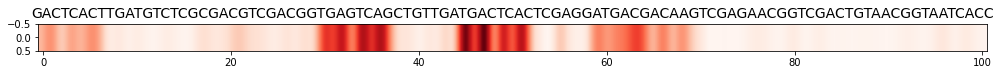

In [269]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(17, 0.5))
ax.imshow(data.T, interpolation='lanczos', cmap='Reds', aspect='auto')
ax.set_title(bseq, color='black',fontsize= 14)
plt.show()

In [270]:
#motifs to look for (TGACTCA, TGAGTCA, and TGACGTCA)

In [271]:
#the model indeed looks for the motifs

In [272]:
#Sequences that maximize the model’s output have exactly
#the properties we expect them to, which gives us confidence that the model is work‐
#ing well.

In [274]:
#part2 Predicting Uncertainty

In [275]:
#we will use the solubility model from Chapter 4. Recall that
#this model takes a molecule as input, represented as a molecular graph, and outputs a
#number indicating how easily it dissolves in water.

In [277]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets
#uncertainity is important to include
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2, uncertainty=True)
model.fit(train_dataset, nb_epoch=100)

Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.






/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.0

In [278]:
y_pred, y_std = model.predict_uncertainty(test_dataset)

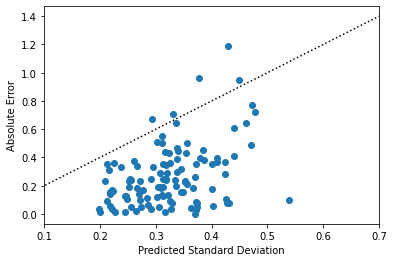

In [280]:
plt.scatter(y_std, np.abs(y_pred-test_dataset.y))
plt.plot([0, 0.7], [0, 1.4], 'k:')
plt.xlim([0.1, 0.7])
plt.xlabel('Predicted Standard Deviation')
plt.ylabel('Absolute Error')
plt.show()

In [281]:
#Making a model more interpretable or explainable may not affect the accuracy of its
#predictions, but it can still have a huge impact on the real-world consequences of
#those predictions. It is an essential part of model design.

In [282]:
#chapter completed

In [283]:
#very useful chapter